# Intro to Pandas

If you installed Python using Anaconda, chances are you already have pandas installed. Just import the library and give it the alias `pd`: this way, you will be able to access all of its functions by typing `pd.pandas_functions`.

In [2]:
import pandas as pd

We will start by creating some tables of data:

In [3]:
names = ["Erika", "Javi", "Maria", "Ana", "Shekhar", "Muriel", "Saira", "Alex", "Kit", "Dog"]
ages = [22, 50, 23, 29, 44, 30, 25, 71, 35, 2]
nations = ["DE", "ES", "ES", "ES", "IN", "DE", "IN", "UK", "UK", "XX"]
siblings = [2, 0, 4, 1, 1, 2, 3, 7, 0, 9]
colors = ["Red", "Yellow", "Yellow", "Blue", "Red", "Yellow", "Blue", "Blue", "Red", "Gray"]



people = pd.DataFrame({"name":names,
                       "age":ages,
                       "country":nations,
                       "siblings":siblings,
                       "favorite_color":colors
                      })

people

,name,age,country,siblings,favorite_color
0,Erika,22,DE,2,Red
1,Javi,50,ES,0,Yellow
2,Maria,23,ES,4,Yellow
3,Ana,29,ES,1,Blue
4,Shekhar,44,IN,1,Red
5,Muriel,30,DE,2,Yellow
6,Saira,25,IN,3,Blue
7,Alex,71,UK,7,Blue
8,Kit,35,UK,0,Red
9,Dog,2,XX,9,Gray


These kind of tables, with rows and columns, are called dataframes within the pandas ecosystem.

## Exploring data

These functions are really handy to quickly explore the data in a dataframe:

In [4]:
# list of columns, their data types and whether or not they contain missing data:
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            10 non-null     object
 1   age             10 non-null     int64 
 2   country         10 non-null     object
 3   siblings        10 non-null     int64 
 4   favorite_color  10 non-null     object
dtypes: int64(2), object(3)
memory usage: 528.0+ bytes


In [5]:
# summarize numerical columns:
people.describe()

,age,siblings
count,10.000000,10.000000
mean,33.100000,2.900000
std,18.645524,2.998148
min,2.000000,0.000000
25%,23.500000,1.000000
50%,29.500000,2.000000
75%,41.750000,3.750000
max,71.000000,9.000000


In [6]:
# Retrieve just the first `n` rows
people.head(3)

,name,age,country,siblings,favorite_color
0,Erika,22,DE,2,Red
1,Javi,50,ES,0,Yellow
2,Maria,23,ES,4,Yellow


In [7]:
# Retrieve just the last `n` rows
people.tail(3)

,name,age,country,siblings,favorite_color
7,Alex,71,UK,7,Blue
8,Kit,35,UK,0,Red
9,Dog,2,XX,9,Gray


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'siblings'}>]], dtype=object)

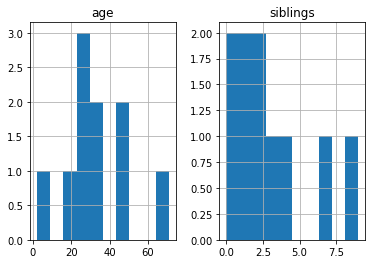

In [8]:
# generate histograms of numerical columns:
people.hist()

## Selecting data

### Selecting columns

Each column of a dataframe can be retrieved by typing `df_name.column_name`:

In [9]:
people.name

0      Erika
1       Javi
2      Maria
3        Ana
4    Shekhar
5     Muriel
6      Saira
7       Alex
8        Kit
9        Dog
Name: name, dtype: object

Or with `df_name["column_name"]`:

In [10]:
people["name"]

0      Erika
1       Javi
2      Maria
3        Ana
4    Shekhar
5     Muriel
6      Saira
7       Alex
8        Kit
9        Dog
Name: name, dtype: object

Using square brackets allows you to pass in a list of column names and select mulitple columns:

In [11]:
people[["name", "age"]]

,name,age
0,Erika,22
1,Javi,50
2,Maria,23
3,Ana,29
4,Shekhar,44
5,Muriel,30
6,Saira,25
7,Alex,71
8,Kit,35
9,Dog,2


### Selecting rows

Check pandas documentation here: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

Every row has an `index`: by default the index is an integer, starting at `0`. You can use this index in combination with `.loc[]` to select the rows and the columns that you want:

In [12]:
# select row with index=6, and all of the columns
people.loc[6,]

name              Saira
age                  25
country              IN
siblings              3
favorite_color     Blue
Name: 6, dtype: object

In [13]:
# select rows from index=0 to index=2, and all of the columns
people.loc[0:2,]

,name,age,country,siblings,favorite_color
0,Erika,22,DE,2,Red
1,Javi,50,ES,0,Yellow
2,Maria,23,ES,4,Yellow


In [14]:
# select rows from index=4 till the last row, and only the "country" column
people.loc[4:,"country"]

4    IN
5    DE
6    IN
7    UK
8    UK
9    XX
Name: country, dtype: object

Bear in mind that the index of a dataframe will not necessarily be a number. Let's make the column `name` become the index:

In [15]:
people_2 = people.set_index("name")
people_2

,age,country,siblings,favorite_color
name,,,,
Erika,22,DE,2,Red
Javi,50,ES,0,Yellow
Maria,23,ES,4,Yellow
Ana,29,ES,1,Blue
Shekhar,44,IN,1,Red
Muriel,30,DE,2,Yellow
Saira,25,IN,3,Blue
Alex,71,UK,7,Blue
Kit,35,UK,0,Red


Whenever that's the case, the `loc[]` function can be used similarly:

In [16]:
people_2.loc["Kit":,]

,age,country,siblings,favorite_color
name,,,,
Kit,35,UK,0,Red
Dog,2,XX,9,Gray


No matter what the index is, you can always use `iloc[]` to select rows and columns based on their position in the dataframe:

In [17]:
# select rows from position 1 (included) to position 3 (not included), 
# and columns from position 0 (included) to position 2 (not included)
people_2.iloc[1:3, 0:2:]

,age,country
name,,
Javi,50,ES
Maria,23,ES


## Grouping and aggregating

Read the docs here: https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html

Similar to SQL, you can use `.groupby()` to group data, in combination with aggregation functions such as `.mean()`:

In [18]:
people.groupby("country").mean()

,age,siblings
country,,
DE,26.0,2.000000
ES,34.0,1.666667
IN,34.5,2.000000
UK,53.0,3.500000
XX,2.0,9.000000


A more simple aggregation is just counting how many rows belong to each category (for categorical columns). This can be done with `value_counts()`:

In [19]:
people.country.value_counts()

ES    3
DE    2
IN    2
UK    2
XX    1
Name: country, dtype: int64

### Merging dataframes

Merging dataframes is similar in pandas than it is in SQL.

Read the docs here: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

Let's create another dataframe:

In [20]:
countries = ["Spain", "India", "Italy", "Argentina", "France", "United Kingdom", "Malta", "Germany"]
country_code = ["ES", "IN", "IT", "AR", "FR", "UK", "MA", "GE"]
population = [46, 1380, 61, 43, 63, 65, 2, 82]

country_info = pd.DataFrame({"country":country_code, 
                             "country_name":countries, 
                             "pop":population})
country_info.head()

,country,country_name,pop
0,ES,Spain,46
1,IN,India,1380
2,IT,Italy,61
3,AR,Argentina,43
4,FR,France,63


In [21]:
# merge to dataframes using a "left" join, on the "country" column:
people.merge(country_info, 
             how="left",
             on="country"
            )

,name,age,country,siblings,favorite_color,country_name,pop
0,Erika,22,DE,2,Red,NaN,NaN
1,Javi,50,ES,0,Yellow,Spain,46.0
2,Maria,23,ES,4,Yellow,Spain,46.0
3,Ana,29,ES,1,Blue,Spain,46.0
4,Shekhar,44,IN,1,Red,India,1380.0
5,Muriel,30,DE,2,Yellow,NaN,NaN
6,Saira,25,IN,3,Blue,India,1380.0
7,Alex,71,UK,7,Blue,United Kingdom,65.0
8,Kit,35,UK,0,Red,United Kingdom,65.0
9,Dog,2,XX,9,Gray,NaN,NaN


### Dataframes to csv files

You can export your dataframes to csv files using `to_csv`:

In [23]:
country_info.to_csv("data/country_info.csv", index=False)
people.to_csv("data/people.csv", index=False)